IMPORT LIBRARIES/DATASETS

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [0]:
from keras.datasets import cifar10
(X_train,y_train) , (X_test,y_test) = cifar10.load_data()

In [124]:
X_train.shape

(50000, 32, 32, 3)

In [125]:
X_test.shape

(10000, 32, 32, 3)

In [126]:
y_train.shape

(50000, 1)

In [127]:
y_test.shape

(10000, 1)

# VISUALIZE DATA

[0]


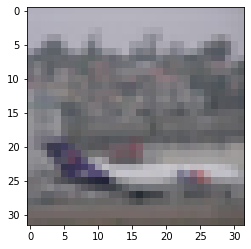

In [128]:
i = 30000
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


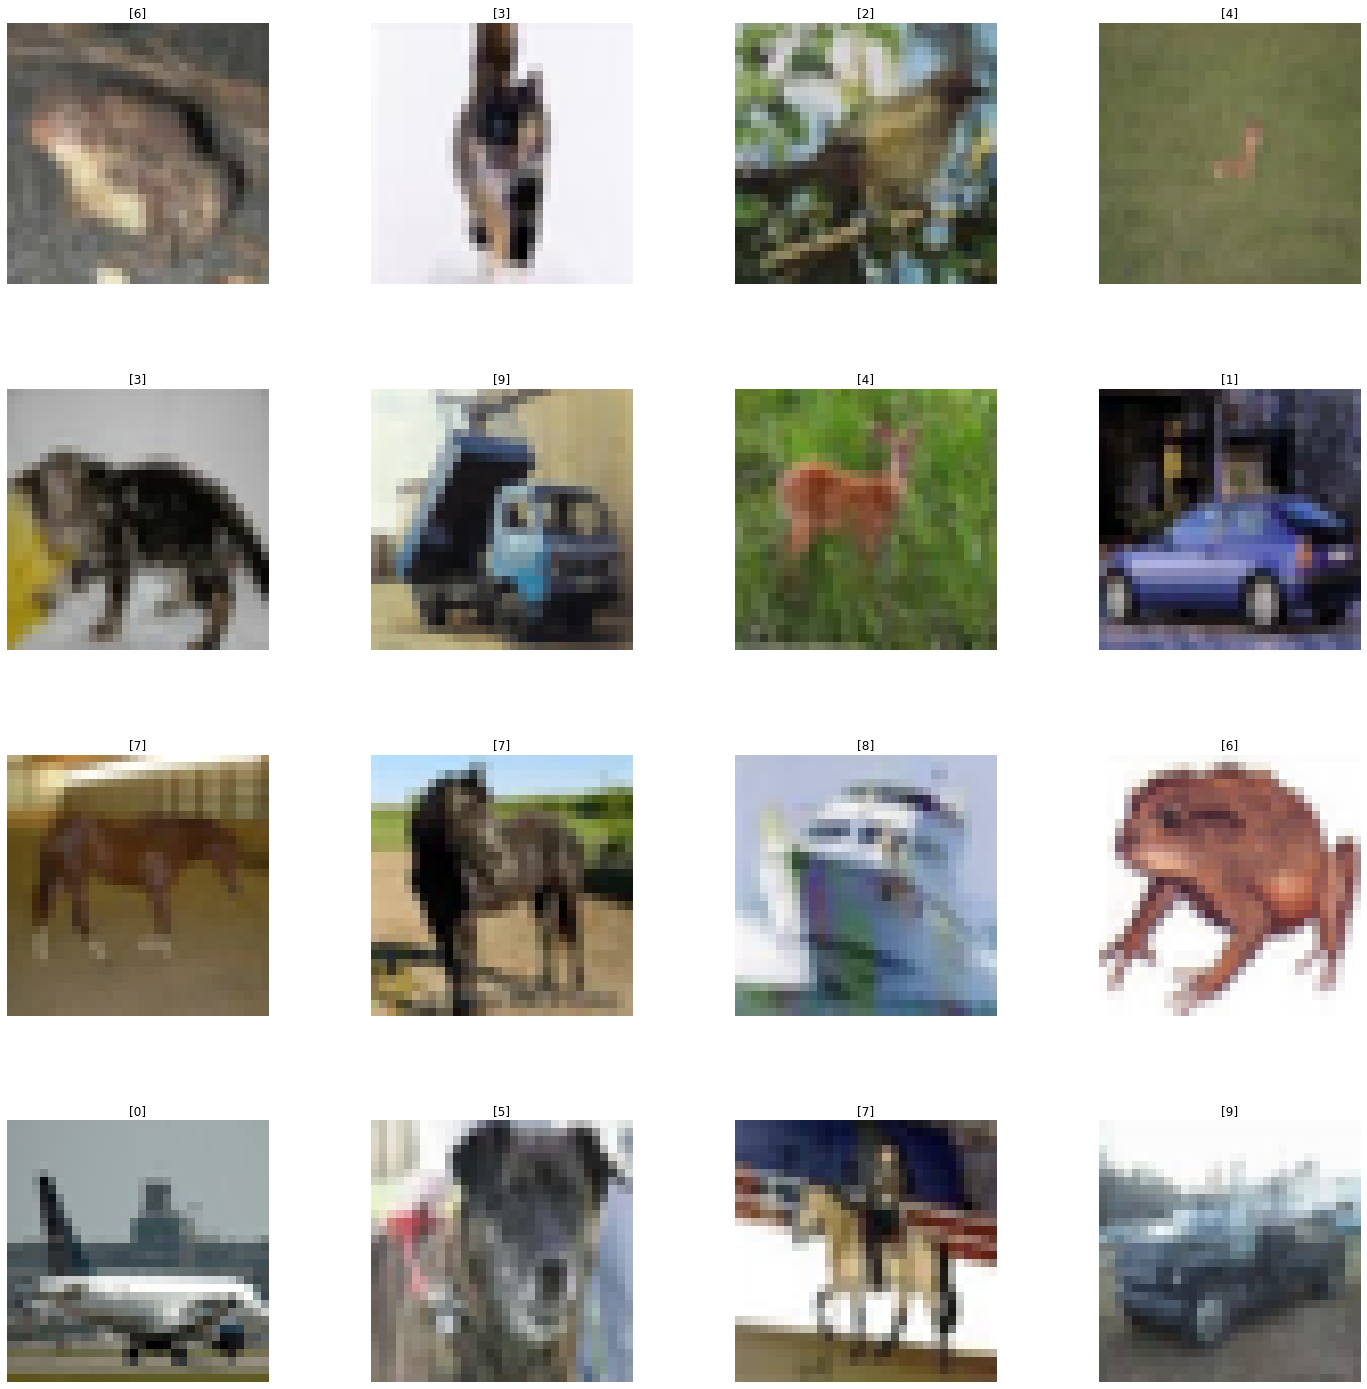

In [129]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid,W_grid,figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid * W_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [130]:
n_training

50000

# DATA PREPARATION

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
number_cat = 10

In [133]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
import keras
y_train = keras.utils.to_categorical(y_train,number_cat)

In [135]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
y_test = keras.utils.to_categorical(y_test,number_cat)

In [137]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [139]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [140]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
Input_shape = X_train.shape[1:]

In [142]:
Input_shape

(32, 32, 3)

# TRAIN THE MODEL

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, AveragePooling2D, Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [0]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [147]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Epoch 1/10
50000/50000 [==============================] - 14s 288us/step - loss: 1.6153 - acc: 0.4247
Epoch 2/10
50000/50000 [==============================] - 14s 274us/step - loss: 1.2198 - acc: 0.5786
Epoch 3/10
50000/50000 [==============================] - 14s 274us/step - loss: 1.1324 - acc: 0.6122
Epoch 4/10
50000/50000 [==============================] - 14s 275us/step - loss: 1.0836 - acc: 0.6343
Epoch 5/10
50000/50000 [==============================] - 14s 274us/step - loss: 1.0479 - acc: 0.6515
Epoch 6/10
50000/50000 [==============================] - 14s 273us/step - loss: 1.0261 - acc: 0.6565
Epoch 7/10
50000/50000 [==============================] - 14s 273us/step - loss: 1.0298 - acc: 0.6604
Epoch 8/10
50000/50000 [==============================] - 14s 273us/step - loss: 1.0132 - acc: 0.6671
Epoch 9/10
50000/50000 [==============================] - 14s 272us/step - loss: 1.0301 - acc: 0.6640
Epoch 10/10
50000/50000 [==============================] - 14s 278us/step - loss: 

# EVALUATE THE MODEL

In [148]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 109us/step
Test Accuracy: 0.6958


In [149]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 0, 7])

In [150]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [0]:
y_test = y_test.argmax(1)

In [152]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

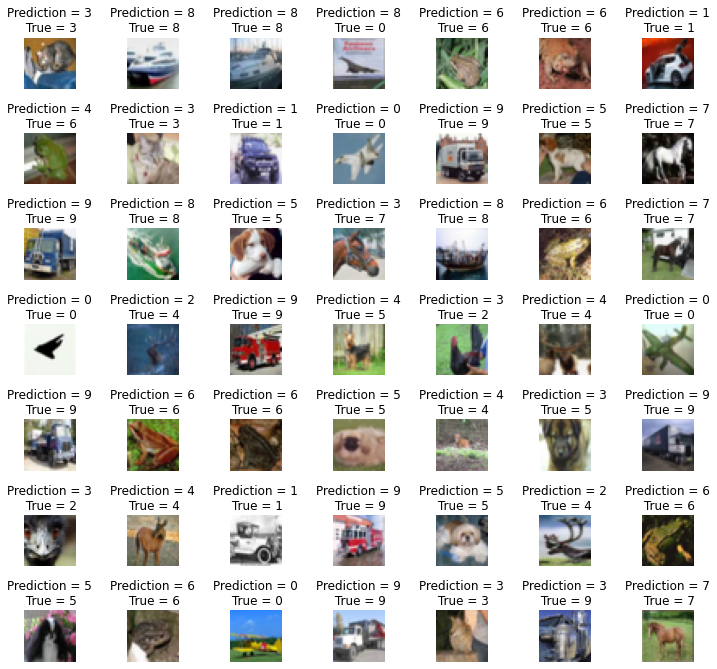

In [153]:
L = 7
W = 7
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_test[i]))

  axes[i].axis('off')

plt.subplots_adjust(wspace=1)

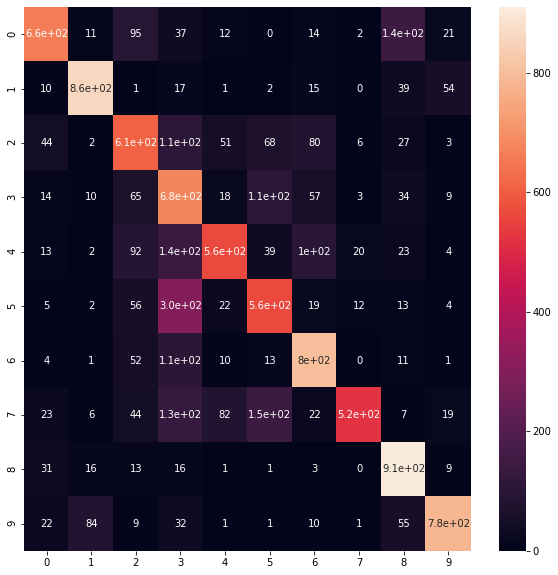

In [154]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot = True)

# IMPROVING THE MODEL WITH DATA AUGMENTATION

In [0]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [170]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
n = 8 
X_train_sample = X_train[:n]

In [172]:
X_train_sample.shape

(8, 32, 32, 3)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(rotation_range = 90)
datagen_train = ImageDataGenerator(vertical_flip=True)
datagen_train = ImageDataGenerator(height_shift_range=0.5)
datagen_train = ImageDataGenerator(brightness_range=(1,3))


datagen_train.fit(X_train_sample)

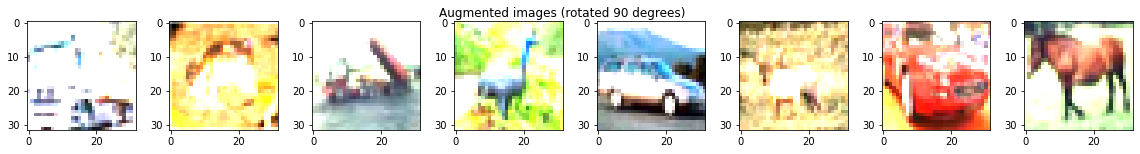

In [174]:
from keras.preprocessing.image import array_to_img


fig = plt.figure(figsize = (20,2))
for x_batch in datagen_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(array_to_img(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [0]:
datagen.fit(X_train)

In [0]:
y_train = keras.utils.to_categorical(y_train, number_cat)

In [179]:
cnn_model.fit_generator(datagen.flow(X_train,y_train, batch_size = 32), epochs = 2)

Epoch 1/2
1563/1563 [==============================] - 36s 23ms/step - loss: 14.5068 - acc: 0.1000
Epoch 2/2
1563/1563 [==============================] - 36s 23ms/step - loss: 14.5065 - acc: 0.1000


In [0]:
y_test = keras.utils.to_categorical(y_test,number_cat)

In [181]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

10000/10000 [==============================] - 1s 102us/step
Test accuracy 0.1
